**Food Delivery Cost and Profitability Analysis: Process We Can Follow**

Food Delivery Cost and Profitability Analysis involves examining all the costs
associated with delivering food orders, from direct expenses like delivery fees and
packaging to indirect expenses like discounts offered to customers and commission
fees paid by restaurants. By juxtaposing these costs against the revenue generated
(primarily through order values and commission fees), the analysis aims to provide
insights into how profitable the food delivery service is on a per-order basis.
Below is the process we can follow for the task of Food Delivery Cost and
Profitability Analysis:
(40 Marks)
Food Delivery Cost and Profitability Analysis: Process We Can Follow
Food Delivery Cost and Profitability Analysis involves examining all the costs
associated with delivering food orders, from direct expenses like delivery fees and
packaging to indirect expenses like discounts offered to customers and commission
fees paid by restaurants. By juxtaposing these costs against the revenue generated
(primarily through order values and commission fees), the analysis aims to provide
insights into how profitable the food delivery service is on a per-order basis.
Below is the process we can follow for the task of Food Delivery Cost and
Profitability Analysis:
(40 Marks)



1. Start by gathering comprehensive data related to all aspects of food delivery
operations. Links here: 2
https://statso.io/wp-content/uploads/2024/02/food_orders_new_delhi.c

In [128]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Kevin\Downloads\food_orders_new_delhi.csv"
data = pd.read_csv(file_path)


2. Clean the dataset for inconsistencies, missing values, or irrelevant information. 5

In [27]:
# Display the first few rows of the dataset
print(data.head())

   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                  

In [129]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64


In [130]:
# Fill or drop missing values 
data.dropna(inplace=True)
# Check for duplicates
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
data = data.drop_duplicates()

Number of duplicate rows: 0


In [29]:
# Display data types for further cleaning
print(data.dtypes)

Order ID                   int64
Customer ID               object
Restaurant ID             object
Order Date and Time       object
Delivery Date and Time    object
Order Value                int64
Delivery Fee               int64
Payment Method            object
Discounts and Offers      object
Commission Fee             int64
Payment Processing Fee     int64
Refunds/Chargebacks        int64
dtype: object


In [131]:
# convert date and time columns to datetime
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])
print(data.dtypes)


Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
dtype: object


3. Find the most common payment method. What is the proportion of the most
common payment method? 3

In [132]:

payment_counts = data['Payment Method'].value_counts()  
most_common_payment_method = payment_counts.idxmax()
most_common_payment_proportion = payment_counts.max() / payment_counts.sum()

print(f"Most Common Payment Method: {most_common_payment_method}")
print(f"Proportion of Most Common Payment Method: {most_common_payment_proportion:.2%}")


Most Common Payment Method: Cash on Delivery
Proportion of Most Common Payment Method: 35.83%


4. Find 95% confidence interval of the proportion of the most common payment
method 2

In [133]:
import numpy as np
from scipy import stats

# Parameters for the confidence interval calculation
n = payment_counts # Total number of payments
p = most_common_payment_proportion  # Proportion of the most common payment method
count = most_common_payment_method # Count of the most common payment method

# Standard error calculation
se = np.sqrt(p * (1 - p) / n)

# Z-score for a 95% confidence level
z_score = stats.norm.ppf(0.975)  # For two-tailed test, we use 0.975

# Confidence interval calculation
confidence_interval = (
    p - z_score * se,
    p + z_score * se
)
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


95% Confidence Interval: [0.3283, 0.3877]


5. Determine the average and the median commission fee. 1

In [134]:
# Calculate the average (mean) commission fee
average_commission_fee = data['Commission Fee'].mean()

# Calculate the median commission fee
median_commission_fee = data['Commission Fee'].median()

# Print the results
print(f"Average Commission Fee: {average_commission_fee:.2f}")
print(f"Median Commission Fee: {median_commission_fee:.2f}")

Average Commission Fee: 127.36
Median Commission Fee: 128.00


6. Find the average order value of the customer 1

In [135]:
average_order_Value = data['Order Value'].mean()
print(f"average Order Value: {average_order_Value:.2f}")

average Order Value: 1055.35


7. Find the probability that a commission fee is
i). More than 120 2
ii). Less than 143 2
iii). Between 86 and 133 2

In [136]:
# Calculate the total number of commission fee
total_commissions = len(data['Commission Fee'])

# i) Probability that a commission fee is more than 120
prob_more_than_120 = len(data[data['Commission Fee'] > 120]) / total_commissions

# ii) Probability that a commission fee is less than 143
prob_less_than_143 = len(data[data['Commission Fee'] < 143]) / total_commissions

# iii) Probability that a commission fee is between 86 and 133
prob_between_86_and_133 = len(data[(data['Commission Fee'] >= 86) & (data['Commission Fee'] <= 133)]) / total_commissions

# Print the results
print(f"Probability that a commission fee is more than 120: {prob_more_than_120:.4f}")
print(f"Probability that a commission fee is less than 143: {prob_less_than_143:.4f}")
print(f"Probability that a commission fee is between 86 and 133: {prob_between_86_and_133:.4f}")

Probability that a commission fee is more than 120: 0.5595
Probability that a commission fee is less than 143: 0.6000
Probability that a commission fee is between 86 and 133: 0.3215


8. Find the average delivery time of the orders done by the credit card 2

In [137]:


# Calculate the delivery time
data['delivery_time'] = data['Delivery Date and Time'] - data['Order Date and Time']

# Select records where payment method is Credit Card
credit_card_orders = data[data['Payment Method'] == 'Credit Card']

if not credit_card_orders.empty:
    # Calculate the average delivery time
    mean_delivery_time = credit_card_orders['delivery_time'].mean()
    hours = mean_delivery_time.total_seconds() / 3600
    minutes = (mean_delivery_time.total_seconds() % 3600) / 60
    average_delivery_time = f'{hours:.2f} hours and {minutes:.2f} minutes'
else:
    average_delivery_time = 'No deliveries by credit card'

# Output the average delivery time
print('Average delivery time of the orders done by credit card:')
print(average_delivery_time)



Average delivery time of the orders done by credit card:
1.23 hours and 13.86 minutes


9. What is the lowest order value of 10% largest orders done by Cash on delivery? 3

In [138]:

   # Filter for Cash on Delivery orders
cash_on_delivery_orders = data[data['Payment Method'].str.contains('Cash on Delivery', case=False)]

if cash_on_delivery_orders.empty:
    print("No orders made via Cash on Delivery.")
else:
    # Sort the order values in descending order
    sorted_orders = cash_on_delivery_orders.sort_values(by='Order Value', ascending=False)  
    
    # Calculate 10% of the total number of orders
    num_orders = len(sorted_orders)
    cut_off_index = int(num_orders * 0.1)  # Get the index for the largest 10%

    # Select the largest 10% orders
    largest_10_percent_orders = sorted_orders.iloc[:cut_off_index]

    # Get the lowest order value in this subset
    lowest_order_value_largest_10 = largest_10_percent_orders['Order Value'].min()  

    print(f'The lowest order value of the largest 10% of orders done by Cash on Delivery is: {lowest_order_value_largest_10}')


The lowest order value of the largest 10% of orders done by Cash on Delivery is: 1798


10. What is the highest order value of 60% least orders done by Digital Wallet? 3


In [139]:
# Filter for Digital Wallet orders
digital_wallet_orders = data[data['Payment Method'].str.contains('Digital Wallet', case=False)]

if digital_wallet_orders.empty:
    print("No orders made via Digital Wallet.")
else:
    # Sort the order values in ascending order
    sorted_orders = digital_wallet_orders.sort_values(by='Order Value')  
    
    # Calculate 60% of the total number of orders
    num_orders = len(sorted_orders)
    cut_off_index = int(num_orders * 0.6)  #  the index for the top 60%

    # Select the least 60% orders
    least_60_percent_orders = sorted_orders.iloc[:cut_off_index]

    # Get the highest order value in this subset
    highest_order_value_least_60 = least_60_percent_orders['Order Value'].max()  

    print(f'The highest order value of the least 60% of orders done by Digital Wallet is: {highest_order_value_least_60}')

The highest order value of the least 60% of orders done by Digital Wallet is: 1166


11. By what amount is the mean value by Digital Wallet more or less than that of Cash
on delivery? 3

In [140]:

#  Filter the dataset for Digital Wallet and Cash on Delivery
digital_wallet_orders = data[data['Payment Method'] == 'Digital Wallet']
cash_on_delivery_orders = data[data['Payment Method'] == 'Cash on Delivery']

# Step 4: Calculate the mean order amounts for each payment method
mean_digital_wallet = digital_wallet_orders['Order Value'].mean()
mean_cash_on_delivery = cash_on_delivery_orders['Order Value'].mean()

# Step 5: Calculate the difference
if mean_digital_wallet != 0 and mean_cash_on_delivery != 0:
    difference = (mean_digital_wallet - mean_cash_on_delivery) 
    if difference > 0:
        result = f'The mean value by Digital Wallet is {difference:.2f} more than Cash on Delivery'
    else:
        result = f'The mean value by Digital Wallet is {abs(difference):.2f} less than Cash on Delivery'
else:
    result = 'Either mean_digital_wallet or mean_cash_on_delivery is zero. Result is not valid.'
    
# Output the results
print(f'Mean order value for Digital Wallet: {mean_digital_wallet:.2f}')
print(f'Mean order value for Cash on Delivery: {mean_cash_on_delivery:.2f}')
print(result)

Mean order value for Digital Wallet: 1041.93
Mean order value for Cash on Delivery: 1055.56
The mean value by Digital Wallet is 13.63 less than Cash on Delivery


12. The delivery time for any item will take more than 53 minutes. Using a significance
level of 0.05, prove or disapprove this claim. 3

In [143]:
#ensuring delivery time is numeric

if 'delivery_time' in data.columns:
    data['delivery_time'] = pd.to_numeric(data['delivery_time'], errors='coerce')

    # Drop NaN values
    delivery_times = data['delivery_time'].dropna()

    # Calculate sample statistics
    n = len(delivery_times)
    mean_delivery_time = delivery_times.mean()
    std_delivery_time = delivery_times.std(ddof=1)  #  standard deviation

    # Set null hypothesis mean
    mu_0 = 53

    # Calculate the t-statistic
    t_statistic = (mean_delivery_time - mu_0) / (std_delivery_time / np.sqrt(n))

    # Determine critical t-value for one-tailed test
    critical_t = stats.t.ppf(0.95, df=n-1)

    # Print results
    print(f'Mean Delivery Time: {mean_delivery_time}')
    print(f'Standard Deviation: {std_delivery_time}')
    print(f'T-statistic: {t_statistic}')
    print(f'Critical T-Value: {critical_t}')

    # Decision
    if t_statistic > critical_t:
        print("Reject the null hypothesis. There is sufficient evidence to approve the claim that the mean delivery time is greater than 53 minutes.")
    else:
        print("Fail to reject the null hypothesis. There is not enough evidence to approve the claim.")


Mean Delivery Time: 4415411042944.785
Standard Deviation: 1577856302916.814
T-statistic: 79.88817403981788
Critical T-Value: 1.646727724436789
Reject the null hypothesis. There is sufficient evidence to approve the claim that the mean delivery time is greater than 53 minutes.


13. What is the range within which the middle 50% ordering-delivery durations differ? 3

In [112]:
# Sort the ordering-delivery durations in ascending order
sorted_durations = data['delivery_time'].sort_values()

if len(sorted_durations) < 2:
    print("inadequate data to calculate a range.")
else:
    # Calculate the middle 50% of the ordering-delivery durations
    num_durations = len(sorted_durations)
    lower_bound_index = int(num_durations * 0.25)  # Exclude 25% of the shortest durations
    upper_bound_index = int(num_durations * 0.75)  # Exclude 25% of the longest durations

    # Select the middle 50% of the ordering-delivery durations
    middle_50_percent_durations = sorted_durations.iloc[lower_bound_index:upper_bound_index]

    # Find the minimum and maximum durations
    min_duration = middle_50_percent_durations.min()
    max_duration = middle_50_percent_durations.max()

    # Calculate the range
    duration_range = max_duration - min_duration

    print(f'The range within which the middle 50% ordering-delivery durations differ is: {duration_range}')

The range within which the middle 50% ordering-delivery durations differ is: 0 days 00:46:00


14. Find the distribution of various payment methods whose Refunds/Chargebacks is
more than zero. 3

Payment Method
Credit Card         102
Cash on Delivery    101
Digital Wallet       82
Name: count, dtype: int64


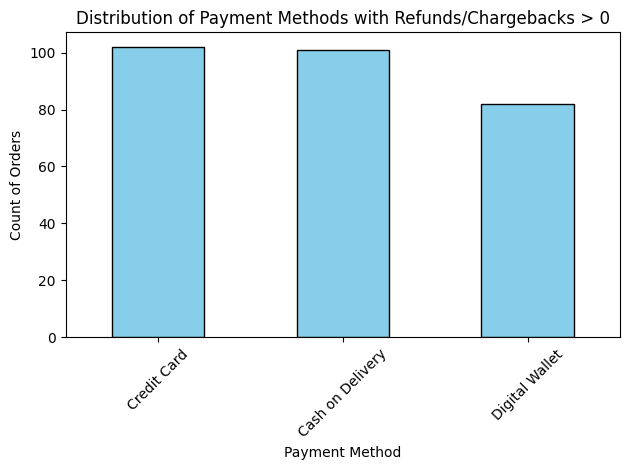

In [121]:

import matplotlib.pyplot as plt


# Ensure that Refunds/Chargebacks is numeric
if 'Refunds/Chargebacks' in data.columns:
    data['Refunds/Chargebacks'] = pd.to_numeric(data['Refunds/Chargebacks'], errors='coerce')
    
    # Filter data where Refunds/Chargebacks is greater than zero
    filtered_data = data[data['Refunds/Chargebacks'] > 0]
    
    # Group by payment method and count occurrences
    payment_method_distribution = filtered_data['Payment Method'].value_counts()
    
    # Print the distribution
    print(payment_method_distribution)
    
    #  Plot the distribution for better visualization
    payment_method_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Payment Methods with Refunds/Chargebacks > 0')
    plt.xlabel('Payment Method')
    plt.ylabel('Count of Orders')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()
else:
    print("The 'Refunds/Chargebacks' column is not present in the dataset.")
